# Python Client for Driverless AI 1.11.X

_This python client for Driverless AI will allow users to interact more intuitively with the product and will also allow scripts to run successfully after upgrades. We appreciate any feedback._

**Note:** Use `Shift+Tab` to see the signature and doc string of any function while in Jupyter <br/>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><a href="#Connect-to-Driverless-AI"><span class="toc-item-num">1&nbsp;&nbsp;</span>Connect to Driverless AI</a></li>
    <li><a href="#Documentation"><span class="toc-item-num">2&nbsp;&nbsp;</span>Documentation</a></li>
    <li>
      <a href="#Data"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a>
      <ul class="toc-item">
        <li><a href="#List-Available-Connectors"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>List Available Connectors</a></li>
        <li><a href="#List-Existing-Datasets"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>List Existing Datasets</a></li>
        <li><a href="#Upload-and-Download-Data"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Upload and Download Data</a></li>
        <li><a href="#Explore-the-Dataset"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Explore the Dataset</a></li>
        <li><a href="#Explore-the-Columns"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Explore the Columns</a></li>
        <li><a href="#Split-a-Dataset"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Split a Dataset</a></li>
      </ul>
    </li>
    <li><a href="#Recipes"><span class="toc-item-num">4&nbsp;&nbsp;</span>Recipes</a></li>
    <li>
      <a href="#Modeling"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a>
      <ul class="toc-item">
        <li><a href="#List-Existing-Experiments"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>List Existing Experiments</a></li>
        <li><a href="#Dictionary-for-a-Use-Case"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Dictionary for a Use Case</a></li>
          <li><a href="#Get-Reccomended-Dial-Settings"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Get Reccomended Dial Settings</a></li>
        <li><a href="#Dictionary-for-Fast-Experiments"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Dictionary for Fast Experiments</a></li>
        <li><a href="#Search-for-Settings"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Search for Settings</a></li>
        <li><a href="#Preview-Using-Our-Custom-Recipe"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Preview Using Our Custom Recipe</a></li>
        <li><a href="#Launch-an-Experiment"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Launch an Experiment</a></li>
        <li><a href="#Information-on-an-Experiment"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Information on an Experiment</a></li>
        <li><a href="#Monitor-and-Finish-the-Model-Early"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Monitor and Finish the Model Early</a></li>
        <li><a href="#View-the-Experiment-Summary"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>View the Experiment Summary</a></li>
        <li><a href="#Interact-with-Model-Artifacts"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>Interact with Model Artifacts</a></li>
        <li><a href="#View-Final-Model-Performance"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>View Final Model Performance</a></li>
        <li><a href="#Variable-Importance"><span class="toc-item-num">5.13&nbsp;&nbsp;</span>Variable Importance</a></li>
        <li><a href="#Retrain-a-Model-for-Production"><span class="toc-item-num">5.14&nbsp;&nbsp;</span>Retrain a Model for Production</a></li>
        <li><a href="#View-the-Pipeline"><span class="toc-item-num">5.15&nbsp;&nbsp;</span>View the Pipeline</a></li>
      </ul>
    </li>
    <li><a href="#Pause the DAI Engine"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pause the DAI Engine</a></li>
  </ul>
</div>


In [ ]:
# Optional - Install the required packages

# !pip install ipython-autotime
# !pip install ipython
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install "h2o-authn~=1.0"
# !pip install h2o-engine-manager


In [24]:
# Setup the download location
download_location = 'artifacts/' #pointing to the artifacts folder  

time: 291 μs (started: 2025-07-10 02:04:53 +00:00)


In [1]:
# Import the required packages

import pandas as pd 
import numpy as np 
import h2o_authn 
import getpass 
import h2o_engine_manager 

# time each cell
%load_ext autotime

time: 111 μs (started: 2025-07-10 01:16:02 +00:00)


## Connect to Driverless AI

To get started, we’ll connect to the H2O AI Engine Manager to manage Driverless AI.

**Get Your API Token and Connect to Engine Manager**

1. Go to [H2O AI Cloud](https://internal.dedicated.h2o.ai)
2. Click on your **username** in the top-right corner
3. Choose **"CLI and API Access"**
4. Or directly visit this link to generate a token:  
   [https://internal.dedicated.h2o.ai/auth/get-platform-token](https://internal.dedicated.h2o.ai/auth/get-platform-token)


You can now list, create, and manage Driverless AI engines using `aiem`.  

In [2]:

# Authenticate with your token

print(f"Visit https://internal.dedicated.h2o.ai/auth/get-platform-token to get your platform token") 
token_provider = h2o_authn.TokenProvider(
  refresh_token=getpass.getpass('Enter your platform token: '),
  client_id="hac-platform-public", 
  token_endpoint_url="https://auth.internal.dedicated.h2o.ai/auth/realms/hac/protocol/openid-connect/token" 
)

aiem = h2o_engine_manager.login(
  environment="https://internal.dedicated.h2o.ai", 
  token_provider=token_provider
)


Visit https://internal.dedicated.h2o.ai/auth/get-platform-token to get your platform token


Enter your platform token:  ········


time: 4.59 s (started: 2025-07-10 01:17:23 +00:00)


In [6]:


dai_engine_client = aiem.dai_engine_client

# Get the list of engines
engines = dai_engine_client.list_engines().engines

# Display available engines
if engines:
    print("Available Engines:\n")
    for idx, engine in enumerate(engines):
        print(f"[{idx}] {engine.display_name} (ID: {engine.engine_id})")

    # Prompt user to select one by index
    selected_idx = int(input("\nSelect an engine by index: "))
    selected_engine = engines[selected_idx]

    # Extract selected engine info
    engine_id = selected_engine.engine_id
    display_name = selected_engine.display_name

    print(f"\nSelected Engine: {display_name} (ID: {engine_id})")
    refreshed_engine = dai_engine_client.get_engine(engine_id=engine_id)
    print(f"Refreshed Status: {refreshed_engine.state.value}")
    
else:
    print("No engines available.")



Available Engines:

[0] New DAI Engine 690 (ID: new-dai-engine-690)



Select an engine by index:  0



Selected Engine: New DAI Engine 690 (ID: new-dai-engine-690)
Refreshed Status: STATE_RUNNING
time: 8.18 s (started: 2025-07-10 01:22:07 +00:00)


In [8]:
# Find the DAI Engine using the Engine ID and connect
dai_engine = dai_engine_client.get_engine(engine_id)

# dai_engine.resume()
# dai_engine.wait()

dai = dai_engine.connect()

time: 3.9 s (started: 2025-07-10 01:22:39 +00:00)


In [9]:
# Check DAI connection 
dai.server.version

<Version('1.11.1.1')>

time: 3.36 ms (started: 2025-07-10 01:22:51 +00:00)


In [10]:
# At any point - we could call the GUI method to get the link 
dai.server.gui()

'https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690'

time: 1.39 ms (started: 2025-07-10 01:23:00 +00:00)


## Documentation
You can get links to the home page and search the documentation from the python client any time you want to know more about a specific DAI functionality.



In [26]:
dai.server.docs("autoviz")

'https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690/docs/userguide/search.html?q=autoviz'

time: 1.5 ms (started: 2025-07-09 15:45:02 +00:00)


In [95]:
dai.server.docs("dataset")

'https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690/docs/userguide/search.html?q=dataset'

time: 1.82 ms (started: 2025-07-09 05:48:27 +00:00)


## Data
Various methods for loading, interacting with, and modifiying data within Driverless AI.

### List Available Connectors
View all ways you are allowed to add data to DAI on this instace - to enable more connectors update the `config.toml` file <br/><br/>
**Note:** Interactions with Data Recipes is not yet available so these connectors are not shown

In [13]:
dai.connectors.list()

['upload',
 's3',
 'snow',
 'file',
 'jdbc',
 'gcs',
 'gbq',
 'azrbs',
 'recipe_file',
 'recipe_url',
 'h2o_drive',
 'upload']

time: 523 ms (started: 2025-07-10 02:01:15 +00:00)


### List Existing Datasets

In [11]:
# Get a link to view all datasets in the UI
dai.datasets.gui()

'https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690/#/datasets'

time: 1.86 ms (started: 2025-07-10 01:23:10 +00:00)


In [32]:
# List all the existing datasets

print("\nExisting Datasets\n")
print(dai.datasets.list(start_index=0))
print("\n")



Existing Datasets

    | Type    | Key                                  | Name
----+---------+--------------------------------------+----------------------
  0 | Dataset | 61c66096-5d32-11f0-80e2-eaa7f4f72b79 | credit_fraud_updated
  1 | Dataset | ef3bc0c0-5d31-11f0-80e2-eaa7f4f72b79 | Telco_Churnv4
  2 | Dataset | 71c96134-5ce0-11f0-9998-4a4fa12acc26 | telco_churn_test
  3 | Dataset | 71c9262e-5ce0-11f0-9998-4a4fa12acc26 | telco_churn_train
  4 | Dataset | 27b5a390-5cdc-11f0-9998-4a4fa12acc26 | Telco_Churnv3
  5 | Dataset | 29da00a2-5c60-11f0-b283-06106caebdd7 | telco_churn_test
  6 | Dataset | 29d9b76e-5c60-11f0-b283-06106caebdd7 | telco_churn_train
  7 | Dataset | f5b350f0-5c4e-11f0-b283-06106caebdd7 | Telco_Churnv2
  8 | Dataset | bccc268a-5c2c-11f0-a191-32096668f8c7 | telco_churn_test
  9 | Dataset | bccbd84c-5c2c-11f0-a191-32096668f8c7 | telco_churn_train
 10 | Dataset | 1ab27940-5c2b-11f0-a191-32096668f8c7 | Telco_Churn
 11 | Dataset | 52d14c7e-515a-11f0-99e9-aa9a50ffaccd | onl

### Upload and Download Data
You can upload data using any method that is enabled on your system. Here we will show:
* Add data from a public s3 link
* Download a dataset
* Upload data from your local machine
* Rename a dataset


In [16]:
# Add a dataset from S3 Bucket
telco_churn = dai.datasets.create(data="https://h2o-internal-release.s3-us-west-2.amazonaws.com/data/Splunk/churn.csv", 
                                  data_source="s3", 
                                  name="Telco_Churnv4")

Complete 100.00% - [4/4] Computed stats for column Churn?
time: 3.97 s (started: 2025-07-10 02:02:29 +00:00)


In [25]:
# Download a dataset
local_file_path = telco_churn.download(download_location, dst_file="churn.csv", overwrite=True)
print("File saved to:", local_file_path)


INFO - Downloaded 'artifacts/churn.csv'
File saved to: artifacts/churn.csv
time: 870 ms (started: 2025-07-10 02:04:59 +00:00)


In [35]:
# Create a dataset using standard upload
credit_fraud = dai.datasets.create("data/credit_default_train.csv", name="credit_fraud")

Complete 100.00% - [4/4] Computed stats for column defaulted
time: 4.8 s (started: 2025-07-10 02:12:24 +00:00)


In [36]:
# Rename a existing dataset 
print("Old Name:", credit_fraud.name)

credit_fraud.rename("credit_fraud_updated")

print("New Name:", credit_fraud.name)

Old Name: credit_fraud
New Name: credit_fraud_updated
time: 457 ms (started: 2025-07-10 02:12:40 +00:00)


### Explore the Dataset
* View the column names
* View the data shape
* View the first and last rows

In [37]:
print(credit_fraud.key, "|", credit_fraud.name)
print("\nColumns:", credit_fraud.columns)
print('\nShape:', credit_fraud.shape)

52a3b8a6-5d33-11f0-80e2-eaa7f4f72b79 | credit_fraud_updated

Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulted']

Shape: (24000, 25)
time: 554 μs (started: 2025-07-10 02:12:44 +00:00)


In [38]:
credit_fraud.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,True
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,False
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,False


time: 227 ms (started: 2025-07-10 02:13:00 +00:00)


In [39]:
credit_fraud.tail()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
29993,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,False
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,False
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,True
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,True
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,True


time: 224 ms (started: 2025-07-10 02:13:08 +00:00)


### Explore the Columns
* View column summaries
* Update the datatype to be used in modeling

In [40]:
# View all column summaries
# print(telco_churn.column_summaries())

time: 202 μs (started: 2025-07-10 02:13:11 +00:00)


In [42]:
# View summaries of selected columns
print(credit_fraud.column_summaries(["LIMIT_BAL","AGE","MARRIAGE","EDUCATION","defaulted"]))

--- LIMIT_BAL ---

 1e+04|████████████████████
      |█████████████
      |████████
      |████
      |███
      |
      |
      |
      |
 1e+06|

Data Type: real
Logical Types: []
Datetime Format: 
Count: 24000
Missing: 0
Mean: 1.67e+05
SD: 1.3e+05
Min: 1e+04
Max: 1e+06
Unique: 80
Freq: 2706
--- AGE ---

 21|██████████████
   |████████████████████
   |███████████████████
   |████████████
   |████████
   |██████
   |██
   |█
   |
 75|

Data Type: int
Logical Types: []
Datetime Format: 
Count: 24000
Missing: 0
Mean: 35.4
SD: 9.2
Min: 21
Max: 75
Unique: 55
Freq: 1280
--- MARRIAGE ---

 0|
  |█████████████████
  |████████████████████
 3|

Data Type: int
Logical Types: []
Datetime Format: 
Count: 24000
Missing: 0
Mean: 1.55
SD: 0.522
Min: 0
Max: 3
Unique: 4
Freq: 12806
--- EDUCATION ---

 0|
  |███████████████
  |████████████████████
  |███████
  |
  |
 6|

Data Type: int
Logical Types: []
Datetime Format: 
Count: 24000
Missing: 0
Mean: 1.85
SD: 0.792
Min: 0
Max: 6
Unique: 7
Freq: 11256
-

In [43]:
# Force a numeric column to only be used as a category
credit_fraud.set_logical_types({'MARRIAGE': ['categorical']})
print(credit_fraud.column_summaries()["MARRIAGE"])

--- MARRIAGE ---

 0|
  |█████████████████
  |████████████████████
 3|

Data Type: int
Logical Types: ['categorical']
Datetime Format: 
Count: 24000
Missing: 0
Mean: 1.55
SD: 0.522
Min: 0
Max: 3
Unique: 4
Freq: 12806
time: 882 ms (started: 2025-07-10 02:16:11 +00:00)


### Split a Dataset
The split function returns a dictionary of two datasets so you can easily pass them to the experiments

In [45]:
credit_fraud_split = credit_fraud.split_to_train_test(
    train_size=0.8, 
    train_name='credit_fraud_train', 
    test_name='credit_fraud_test', 
    target_column= "defaulted", 
    seed=42
)

Complete
time: 3.13 s (started: 2025-07-10 02:22:23 +00:00)


In [51]:
credit_fraud_split

{'train_dataset': <class 'Dataset'> b72b1c3c-5d34-11f0-80e2-eaa7f4f72b79 credit_fraud_train,
 'test_dataset': <class 'Dataset'> b72b691c-5d34-11f0-80e2-eaa7f4f72b79 credit_fraud_test}

time: 1.87 ms (started: 2025-07-10 02:23:49 +00:00)


## Recipes
Recipes are components of the ML pipeline such as algorithms, feature transformers, and scores. You can view all availabe recipes and upload new ones to your instance of DAI.

* List all available models
* List any custom transformers
* List all scorers that can be used for binomial classification
* Upload a custom recipe and save it to be tested later

### Available Models

In [53]:
[m.name for m in dai.recipes.models.list()]

['Aggregator',
 'Constant',
 'DecisionTree',
 'FTRL',
 'GLM',
 'ImageAuto',
 'ImbalancedLightGBM',
 'ImbalancedXGBoostGBM',
 'IsolationForestAnomaly',
 'KMeans',
 'KMeansFreq',
 'KMeansOHE',
 'KNNCUML',
 'LightGBM',
 'LightGBMDask',
 'RFCUML',
 'RFCUMLDask',
 'RuleFit',
 'TensorFlow',
 'TextALBERT',
 'TextBERT',
 'TextCamemBERT',
 'TextDistilBERT',
 'TextMultilingualBERT',
 'TextRoBERTa',
 'TextXLM',
 'TextXLMRoberta',
 'TextXLNET',
 'TorchGrowNet',
 'TruncSVD',
 'Unsupervised',
 'UnsupervisedGeneral',
 'UnsupervisedOneAll',
 'UnsupervisedOneOutput',
 'XGBoostDart',
 'XGBoostDartDask',
 'XGBoostGBM',
 'XGBoostGBMDask',
 'XGBoostRF',
 'XGBoostRFDask',
 'ZeroInflatedLightGBM',
 'ZeroInflatedXGBoost']

time: 797 ms (started: 2025-07-10 02:28:49 +00:00)


### Available Feature Transformers

In [64]:
[t.name for t in dai.recipes.transformers.list()]

['AggregatorTransformer',
 'AutovizRecommendationsTransformer',
 'BERTTransformer',
 'BinnerTransformer',
 'CVCatNumEncodeTransformer',
 'CVTECUMLTransformer',
 'CVTargetEncodeTransformer',
 'CatOriginalTransformer',
 'CatTransformer',
 'ClusterDistCUMLDaskTransformer',
 'ClusterDistCUMLTransformer',
 'ClusterDistTransformer',
 'ClusterIdAllNumTransformer',
 'ClusterTETransformer',
 'DBSCANCUMLDaskTransformer',
 'DBSCANCUMLTransformer',
 'DateOriginalTransformer',
 'DateTimeDiffTransformer',
 'DateTimeOriginalTransformer',
 'DatesTransformer',
 'EwmaLagsTransformer',
 'FrequentTransformer',
 'ImageOriginalTransformer',
 'ImageVectorizerTransformer',
 'InteractionsTransformer',
 'IsHolidayTransformer',
 'IsolationForestAnomalyAllNumericTransformer',
 'IsolationForestAnomalyNumCatAllColsTransformer',
 'IsolationForestAnomalyNumCatTransformer',
 'IsolationForestAnomalyNumericTransformer',
 'LagsAggregatesTransformer',
 'LagsInteractionTransformer',
 'LagsTransformer',
 'LexiLabelEncoderTr

time: 534 ms (started: 2025-07-10 02:35:53 +00:00)


### Available Scorer

Can get the suggested scorers
- for_multiclass
- for_binomial
- for_regression

In [61]:
[s.name for s in dai.recipes.scorers.list() if s.for_multiclass]

['ACCURACY',
 'AUC',
 'AUCPR',
 'F05',
 'F1',
 'F2',
 'GINI',
 'LOGLOSS',
 'MACROAUC',
 'MACROF1',
 'MACROMCC',
 'MCC']

time: 520 ms (started: 2025-07-10 02:35:24 +00:00)


### Create a Custom Feature Recipe

Follow this guide to create your own recipe: [How to Write a Recipe](https://github.com/h2oai/driverlessai-recipes/tree/44a56788f6e9231bde12a4effad5b796754c73e3/how_to_write_a_recipe) 


In [37]:
dai.recipes.create("https://github.com/h2oai/driverlessai-recipes/blob/rel-1.8.6/transformers/numeric/sum.py")

Complete 100.00%


<class 'TransformerRecipe'> SumTransformer

time: 2.16 s (started: 2025-07-09 01:00:57 +00:00)


In [69]:
[t.name for t in dai.recipes.transformers.list() if t.is_custom]

['SumTransformer']

time: 914 ms (started: 2025-07-10 02:56:53 +00:00)


In [80]:
# Add "Custom Created Sum Transformer"
transformers_to_use = [t for t in dai.recipes.transformers.list() if not t.is_custom or 'Sum' in t.name]

time: 540 ms (started: 2025-07-10 03:48:55 +00:00)


## Modeling
**Notes:** Dictionaries allow you to easily use common settings in your experiments <br/>
**Notes:** Experiments will be `sync` by default meaning they will lock the notebook until they are complete. You can also use `async` versions of the functions. With the `async` functions you can use included code below to monitor and experiment as it runs, see logs in real time, and stop it when it is "good enough".

### List Existing Experiments

In [73]:
[e.name for e in dai.experiments.list()]

['korenaki',
 'Fastest Settings deletev2',
 'cenetimo',
 'Fastest Settings delete',
 'bobunifo',
 'Fastest Settings',
 'robaduki',
 'gewisoci',
 'del',
 'fraud_final_1',
 ' fraud_final',
 '1.vidawofo_with_time',
 'vidawofo']

time: 948 ms (started: 2025-07-10 03:23:19 +00:00)


### Dictionary for a Use Case
We might want to run several experiments with different dial and expert settings. All of these will likely have some things in common, namely details about this specific dataset. We will create a dictionary to use in many experiments.

In [74]:
credit_settings = {
    **credit_fraud_split,
    'task': 'classification',
    'target_column': "defaulted",
    'scorer': 'F1'
}

time: 350 μs (started: 2025-07-10 03:46:01 +00:00)


### Get Reccomended Dial Settings

In [76]:
# Get experiment preview with our settings
dai.experiments.preview(
    **credit_settings
)

INFO - 
ACCURACY [5/10]:
- Training data size: *19,200 rows, 24 cols*
- Feature evolution: *[Constant, GLM, LightGBM, XGBoostGBM]*, *3-fold CV*
- Final pipeline: *Blend of up to 3 [Constant, GLM, LightGBM, XGBoostGBM] models, each averaged across 3-fold CV splits*

TIME [3/10]:
- Feature evolution: *4 individuals*, up to *30 iterations*
- Early stopping: After *5* iterations of no improvement

INTERPRETABILITY [7/10]:
- Feature pre-pruning strategy: Permutation Importance FS
- Monotonicity constraints: enabled
- Feature engineering search space: [CVCatNumEncode, CVTargetEncode, CatOriginal, Cat, Frequent, Interactions, NumCatTE, NumToCatTE, NumToCatWoEMonotonic, NumToCatWoE, OneHotEncoding, Original, WeightOfEvidence]

[Constant, GLM, LightGBM, XGBoostGBM] models to train:
- Model and feature tuning: *48*
- Feature evolution: *192*
- Final pipeline: *9*

Estimated runtime: *10 minutes*
Estimated mojo_size: *100.0kB*
Estimated max CPU memory usage: *1.0GB*
Finish/Abort (if not done) in:

### Dictionary for Fast Experiments

There may be several common types of experiments you want to run, and H2O.ai will be creating common experiment settings in dictionaries for easy use. The one below turns off all extra settings such as building pipelines or checking for leakage. It also uses the fastest experiment settings.

In [77]:
fast_settings = {
    'accuracy': 1,
    'time': 1,
    'interpretability': 6,
    'make_python_scoring_pipeline': 'off',
    'make_mojo_scoring_pipeline': 'off',
    'benchmark_mojo_latency': 'off',
    'make_autoreport': False,
    'check_leakage': 'off',
    'check_distribution_shift': 'off'
}

time: 409 μs (started: 2025-07-10 03:47:13 +00:00)


### Search for Settings
There are many expert settings available, you can use the serach functionality to look for names or keywords for settings you may want to use.

In [53]:
dai.experiments.search_expert_settings('imbalanced')

aux_threshold_data_size_large | default_value: 10000000
enable_lightgbm_multiclass_balancing | default_value: auto
force_stratified_splits_for_imbalanced_threshold_binary | default_value: 0.01
imbalance_sampling_method | default_value: off
imbalance_sampling_threshold_min_rows_original | default_value: 100000
imbalance_ratio_sampling_threshold | default_value: 5
heavy_imbalance_ratio_sampling_threshold | default_value: 25
imbalance_ratio_multiclass_threshold | default_value: 5
heavy_imbalance_ratio_multiclass_threshold | default_value: 25
imbalance_sampling_number_of_bags | default_value: -1
imbalance_sampling_max_number_of_bags | default_value: 10
imbalance_sampling_max_number_of_bags_feature_evolution | default_value: 3
imbalance_sampling_max_multiple_data_size | default_value: 1.0
imbalance_sampling_rank_averaging | default_value: auto
imbalance_sampling_target_minority_fraction | default_value: -1.0
imbalance_ratio_notification_threshold | default_value: 2.0
time: 362 ms (started: 

In [78]:
dai.experiments.search_expert_settings('imbalance_sampling_method', show_description=True )

imbalance_sampling_method | default_value: off | Sampling method for imbalanced binary classification problems
  Sampling method for imbalanced binary classification problems. Choices are: "auto": sample both classes as needed, depending on data "over_under_sampling": over-sample the minority class and under-sample the majority class, depending on data "under_sampling": under-sample the majority class to reach class balance "off": do not perform any sampling

imbalance_sampling_threshold_min_rows_original | default_value: 100000 | Threshold for minimum number of rows in original training data to allow imbalanced sampling techniques. For smaller data, will disable imbalanced sampling, no matter what imbalance_sampling_method is set to.
  For smaller data, there's no generally no benefit in using imbalanced sampling methods.

imbalance_ratio_sampling_threshold | default_value: 5 | Ratio of majority to minority class for imbalanced binary classification to trigger special sampling techniq

### Preview Using Our Custom Recipe
Notice that `Sum` has been added to the `Feature engineering search space`

In [81]:
# Get experiment preview with our settings
dai.experiments.preview(
    **credit_settings
    ,transformers=transformers_to_use
)

INFO - 
ACCURACY [5/10]:
- Training data size: *19,200 rows, 24 cols*
- Feature evolution: *[Constant, GLM, LightGBM, XGBoostGBM]*, *3-fold CV*
- Final pipeline: *Blend of up to 3 [Constant, GLM, LightGBM, XGBoostGBM] models, each averaged across 3-fold CV splits*

TIME [3/10]:
- Feature evolution: *4 individuals*, up to *30 iterations*
- Early stopping: After *5* iterations of no improvement

INTERPRETABILITY [7/10]:
- Feature pre-pruning strategy: Permutation Importance FS
- Monotonicity constraints: enabled
- Feature engineering search space: [CVCatNumEncode, CVTargetEncode, CatOriginal, Cat, Frequent, Interactions, NumCatTE, NumToCatTE, NumToCatWoEMonotonic, NumToCatWoE, OneHotEncoding, Original, Sum, WeightOfEvidence]

[Constant, GLM, LightGBM, XGBoostGBM] models to train:
- Model and feature tuning: *48*
- Feature evolution: *192*
- Final pipeline: *9*
- Transformers without MOJO support: *['Sum']*

Estimated runtime: *10 minutes*
Estimated mojo_size: *100.0kB*
Estimated max CPU 

### Launch an Experiment
We will start by running an async experiment which will immeadiatly free our notebook to run additional commands

In [83]:
default_baseline = dai.experiments.create_async(
    **credit_settings, 
    name='Fastest Settings credit delete', **fast_settings,
    # name='Default Baseline', accuracy=7, time=2, interpretability=8
)

INFO - Experiment launched at: https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690/#/experiment?key=4e2e82b6-5d41-11f0-80e2-eaa7f4f72b79
time: 2.29 s (started: 2025-07-10 03:52:29 +00:00)


### Information on an Experiment

In [84]:
print("Name:", default_baseline.name)
print("Datasets:", default_baseline.datasets)
print("Target:", default_baseline.settings['target_column']) # beta users from before March 15th use target_col
print("Scorer:", default_baseline.metrics()['scorer'])
print("Task:", default_baseline.settings['task'])
print("Status:", default_baseline.status(verbose=2))
print("Web Page: ", end='')
default_baseline.gui()

Name: Fastest Settings credit delete
Datasets: {'train_dataset': <class 'Dataset'> b72b1c3c-5d34-11f0-80e2-eaa7f4f72b79 credit_fraud_train, 'validation_dataset': None, 'test_dataset': <class 'Dataset'> b72b691c-5d34-11f0-80e2-eaa7f4f72b79 credit_fraud_test}
Target: defaulted
Scorer: F1
Task: classification
Status: Complete 100.00% - Status: Complete
Web Page: 

'https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690/#/experiment?key=4e2e82b6-5d41-11f0-80e2-eaa7f4f72b79'

time: 1.81 s (started: 2025-07-10 03:53:38 +00:00)


### Monitor and Finish the Model Early
Example of how you may want to monitor a running experiment, this will print the currently logs and accuracy metrics. You can also finish a model early if it reaches a certain accuracy metric or run time.

In [53]:
# Monitor the experiment and stop at a nice model
import time
from IPython.display import clear_output

while default_baseline.is_running():
    time.sleep(1)
    
    # grab experiment status
    status = default_baseline.status(verbose=2)
    
    # grab current metrics
    metrics = default_baseline.metrics()   
    
    # pretty print info
    clear_output(wait=True)
    print(status, " - Validation ", metrics['scorer'], ": ", sep='', end='')
    
    if metrics['val_score'] is not None:
        print(round(metrics['val_score'], 4), '+/-', round(metrics['val_score_sd'], 4))
        if metrics['val_score'] > 0.9:
            default_baseline.finish()
    else:
        print()
    
    print()
    default_baseline.log.tail(3)
    time.sleep(1)
    
print("\nTest ", default_baseline.metrics()['scorer'], ": ", 
      round(default_baseline.metrics()['test_score'], 4), sep='')

Running 96.00% - Building pipeline visualization... - Validation F1: 0.8618 +/- 0.024


Test F1: 0.8249
time: 60 s (started: 2025-07-09 01:02:30 +00:00)


### View the Experiment Summary

In [85]:
print(default_baseline.summary)

Status: Complete
Experiment: Fastest Settings credit delete (4e2e82b6-5d41-11f0-80e2-eaa7f4f72b79)
  Version: 1.11.1.1, 2025-07-10 03:53, Py client
  Settings: 1/1/6, seed=979736099, GPUs disabled
  Train data: credit_fraud_train (19200, 25)
  Validation data: N/A
  Test data: [Test] (4800, 24)
  Target column: defaulted (binary, 22.120% target class)
System specs: Linux, 31 GB, 8 CPU cores, 0/0 GPU
  Max memory usage: 1.13 GB, 0 GB GPU, 0 GB MOJO
Recipe: AutoDL (7 iterations, 2 individuals)
  Validation scheme: stratified, 1 internal holdout
  Feature engineering: 127 features scored (71 selected)
Timing:
  Data preparation: 4.61 secs
  Shift/Leakage detection: 0.01 secs
  Model and feature tuning: 15.90 secs (8 models trained)
  Feature evolution: 0.91 secs (0 of 3 model trained)
  Final pipeline training: 23.97 secs (7 models trained)
  Python / MOJO scorer building: 0.00 secs / 15.59 secs
Validation score: F1 = 0.3622638 (constant preds of -1.259)
Validation score: F1 = 0.5421687 +

### Interact with Model Artifacts
* See which are available
* Create the AutoReport
* Download the AutoReport
* Open the AutoReport

In [56]:
print("Available artifacts:", default_baseline.artifacts.list())

Available artifacts: ['logs', 'summary', 'test_predictions', 'train_predictions']
time: 108 ms (started: 2025-07-09 01:18:05 +00:00)


In [86]:
dir(default_baseline.artifacts)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_experiment',
 '_get_path',
 '_model_ready',
 '_paths',
 '_prediction_dataset_type',
 '_update',
 'create',
 'download',
 'export',
 'file_paths',
 'list']

time: 1.63 ms (started: 2025-07-10 03:55:58 +00:00)


In [87]:
default_baseline.artifacts.create('autoreport')

INFO - Generating autodoc...
time: 57.8 s (started: 2025-07-10 03:56:40 +00:00)


In [88]:
artifacts = default_baseline.artifacts.download(['autoreport'], download_location, overwrite=True)

INFO - Downloaded 'artifacts/report.docx'
time: 863 ms (started: 2025-07-10 03:57:38 +00:00)


### View Final Model Performance

In [90]:
default_baseline.metrics()

{'scorer': 'F1',
 'val_score': 0.5407629852074296,
 'val_score_sd': 0.0047554943697719,
 'val_roc_auc': 0.7785155672846736,
 'val_pr_auc': 0.5497541876581336,
 'test_score': 0.5695364238410596,
 'test_score_sd': 0.011684705435773136,
 'test_roc_auc': 0.7983240027850578,
 'test_pr_auc': 0.5983388628643111}

time: 225 ms (started: 2025-07-10 04:00:10 +00:00)


In [91]:
# Formatted Score Results
print("Validation", default_baseline.metrics()["scorer"], ":\t",round(default_baseline.metrics()['val_score'], 3))
print("Test", default_baseline.metrics()["scorer"], ":\t",round(default_baseline.metrics()['test_score'], 3))

Validation F1 :	 0.541
Test F1 :	 0.57
time: 895 ms (started: 2025-07-10 04:00:13 +00:00)


### Variable Importance

In [108]:
default_baseline.variable_importance()

gain,interaction,description
1,2_OHE:PAY_0.5,One-hot encoding for column(s) ['PAY_0'] binned into 11 bins (sorting order - lexical). Bin # 5 with levels ['2.0'] [internal:lexical]
0.315281,3_OHE:PAY_2.5,One-hot encoding for column(s) ['PAY_2'] binned into 11 bins (sorting order - lexical). Bin # 5 with levels ['2.0'] [internal:lexical]
0.277619,15_LIMIT_BAL,LIMIT_BAL (Original)
0.19993,16_PAY_AMT1,PAY_AMT1 (Original)
0.173714,17_PAY_AMT2,PAY_AMT2 (Original)
0.163345,9_BILL_AMT1,BILL_AMT1 (Original)
0.154135,8_AGE,AGE (Original)
0.129801,18_PAY_AMT3,PAY_AMT3 (Original)
0.123324,4_OHE:PAY_3.5,One-hot encoding for column(s) ['PAY_3'] binned into 11 bins (sorting order - lexical). Bin # 5 with levels ['2.0'] [internal:lexical]
0.122025,21_PAY_AMT6,PAY_AMT6 (Original)


time: 798 ms (started: 2025-07-10 06:18:30 +00:00)


### Retrain a Model for Production
* Retrain the final model with the full dataset
* Print the model metrics 
* Create and Download the MOJO

In [93]:
# Search for mojo_scoring_pipeline
dai.experiments.search_expert_settings("mojo_scoring", show_description=True)

make_mojo_scoring_pipeline | default_value: auto | Make MOJO scoring pipeline
  Whether to create the MOJO scoring pipeline at the end of each experiment. If set to "auto", will attempt to create it if possible (without dropping capabilities). If set to "on", might need to drop some models, transformers or custom recipes.

make_triton_scoring_pipeline | default_value: off | Make Triton scoring pipeline
  Whether to create a C++ MOJO based Triton scoring pipeline at the end of each experiment. If set to "auto", will attempt to create it if possible (without dropping capabilities). If set to "on", might need to drop some models, transformers or custom recipes. Requires make_mojo_scoring_pipeline != "off".

make_mojo_scoring_pipeline_for_features_only | default_value: False | Create MOJO for feature engineering pipeline only (no predictions)
  Create MOJO for feature engineering pipeline only (no predictions)

mojo_replace_target_encoding_with_grouped_input_cols | default_value: False | R

In [104]:
# Retrain on all data for productionalizing
full_model = default_baseline.retrain(final_pipeline_only=True, 
                                      train_dataset=credit_fraud,
                                      test_dataset="",
                                      make_mojo_scoring_pipeline="on")

full_model = dai.experiments.get(full_model.key)

INFO - Experiment launched at: https://enginemanager.internal.dedicated.h2o.ai/workspaces/4a110815-00e0-4ace-a9a1-3121aa75d12d/daiEngines/new-dai-engine-690/#/experiment?key=6ff3408e-5d4c-11f0-80e2-eaa7f4f72b79
Complete 100.00% - Status: Complete                               
time: 58.2 s (started: 2025-07-10 05:12:10 +00:00)


In [105]:
full_model.metrics()

{'scorer': 'F1',
 'val_score': 0.5437079731027857,
 'val_score_sd': 0.004916314303224701,
 'val_roc_auc': 0.7842147686439088,
 'val_pr_auc': 0.5605956118473947,
 'test_score': None,
 'test_score_sd': None,
 'test_roc_auc': None,
 'test_pr_auc': None}

time: 217 ms (started: 2025-07-10 05:13:08 +00:00)


In [84]:
artifacts = full_model.artifacts.download("mojo_pipeline", download_location, overwrite=True)

INFO - Downloaded 'mojo.zip'
time: 6.25 s (started: 2025-07-09 03:26:08 +00:00)


### View the Pipeline

In [ ]:
# this is for a mac with unzip installed
!unzip {artifacts["mojo_pipeline"]} -d {download_location}

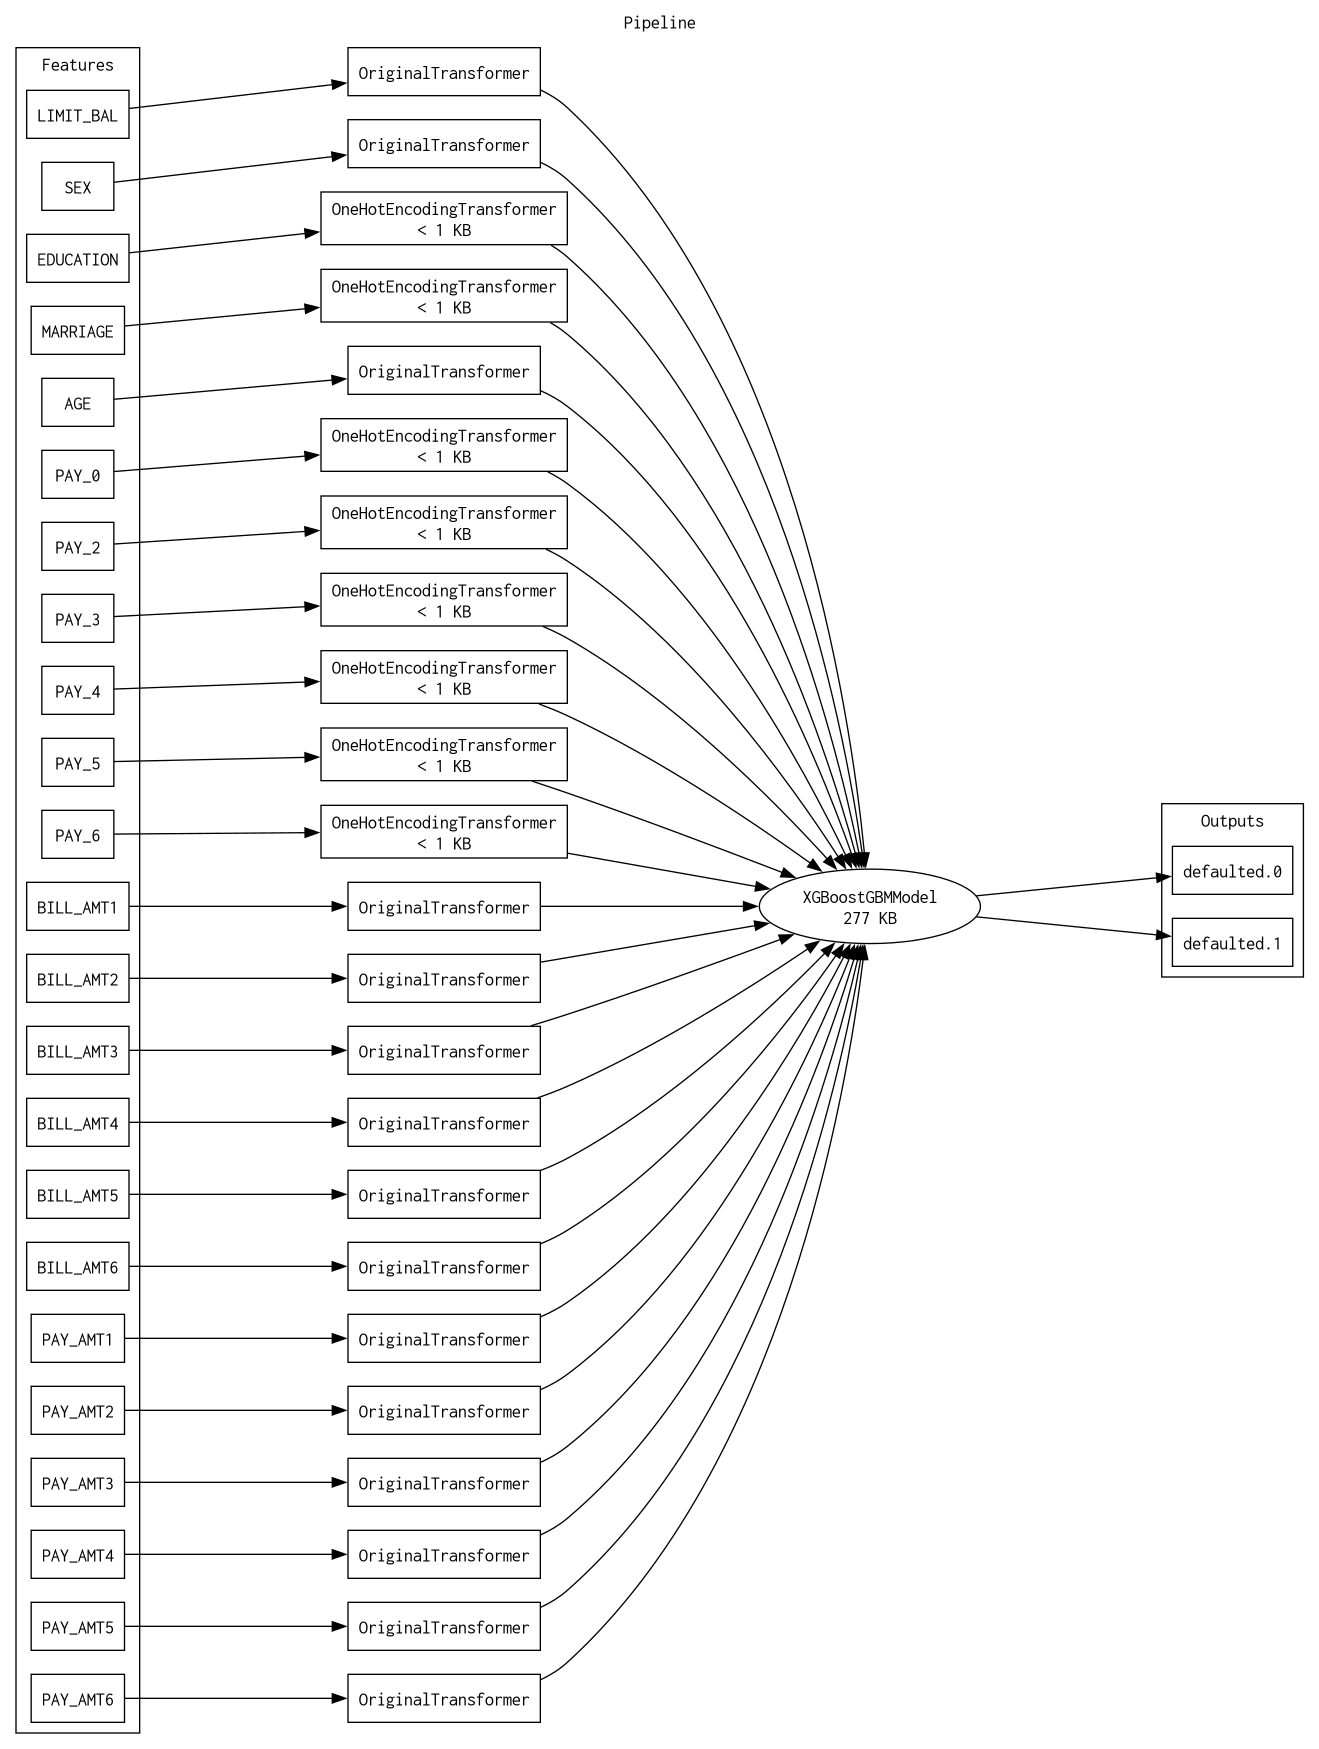

time: 3.56 ms (started: 2025-07-10 05:13:09 +00:00)


In [106]:
from IPython.display import Image
Image(filename=download_location + 'mojo-pipeline/pipeline.png') 

### Pause the DAI Engine

In [ ]:
dai_engine.pause()